In [1]:
# Initial T S Profiles
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
state1 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/state_001.nc')
state2 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/state_002.nc')
state3 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/state_003.nc')
state4 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/state_004.nc')


s_ini1 = state1.S.data[0,:,:,:]
s_ini2 = state2.S.data[0,:,:,:]
s_ini3 = state3.S.data[0,:,:,:]
s_ini4 = state4.S.data[0,:,:,:]

pt_ini1 = state1.Temp.data[0,:,:,:]
pt_ini2 = state2.Temp.data[0,:,:,:]
pt_ini3 = state3.Temp.data[0,:,:,:]
pt_ini4 = state4.Temp.data[0,:,:,:]

s_end1 = state1.S.data[-1,:,:,:]
s_end2 = state2.S.data[-1,:,:,:]
s_end3 = state3.S.data[-1,:,:,:]
s_end4 = state4.S.data[-1,:,:,:]

pt_end1 = state1.Temp.data[-1,:,:,:]
pt_end2 = state2.Temp.data[-1,:,:,:]
pt_end3 = state3.Temp.data[-1,:,:,:]
pt_end4 = state4.Temp.data[-1,:,:,:]

depth = state1.Z.data



In [3]:
depth

array([  -0.25,   -0.75,   -1.25,   -1.75,   -2.25,   -2.75,   -3.25,
         -3.75,   -4.25,   -4.75,   -5.5 ,   -6.5 ,   -7.5 ,   -8.5 ,
         -9.5 ,  -10.5 ,  -11.5 ,  -12.5 ,  -13.5 ,  -14.5 ,  -15.75,
        -17.25,  -18.75,  -20.25,  -21.75,  -23.25,  -24.75,  -26.25,
        -27.75,  -29.25,  -32.  ,  -36.  ,  -40.  ,  -44.  ,  -48.  ,
        -52.  ,  -56.  ,  -60.  ,  -64.  ,  -68.  ,  -74.  ,  -82.  ,
        -90.  ,  -98.  , -106.  , -114.  , -122.  , -130.  , -138.  ,
       -146.  ])

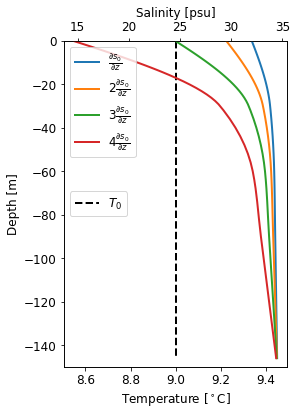

In [13]:
xi, yi = 10, 35

fig1 = plt.figure(figsize=(4,6))
fig1.tight_layout()  

ax1 = fig1.add_subplot(111)
ax1.set_ylim([-150, 0])
ax2 = ax1.twiny()

ax1.plot(pt_ini1[:,yi,xi], depth, 'k--', lw=2, label=r'$T_0$')
ax2.plot(s_ini1[:,yi,xi], depth, '-', lw=2, label=r'$\frac{\partial s_0}{\partial z}$')
ax2.plot(s_ini2[:,yi,xi], depth, '-', lw=2, label=r'$2\frac{\partial s_0}{\partial z}$')
ax2.plot(s_ini3[:,yi,xi], depth, '-', lw=2, label=r'$3\frac{\partial s_0}{\partial z}$')
ax2.plot(s_ini4[:,yi,xi], depth, '-', lw=2, label=r'$4\frac{\partial s_0}{\partial z}$')
#ax2.plot(s_ini4[:,yi,xi], depth, '-', lw=2, label=r'case 4')
ax1.legend(loc='center left', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)


ax1.set_ylabel(r'Depth [m]', size=12)
ax1.set_xlabel(r'Temperature [$^\circ$C]', size=12)
ax2.set_xlabel(r'Salinity [psu]', size=12)

ax1.yaxis.set_tick_params(labelsize=12)
ax1.xaxis.set_tick_params(labelsize=12)
ax2.xaxis.set_tick_params(labelsize=12)
#ax2.set_xticks(fontsize=15)
plt.show()

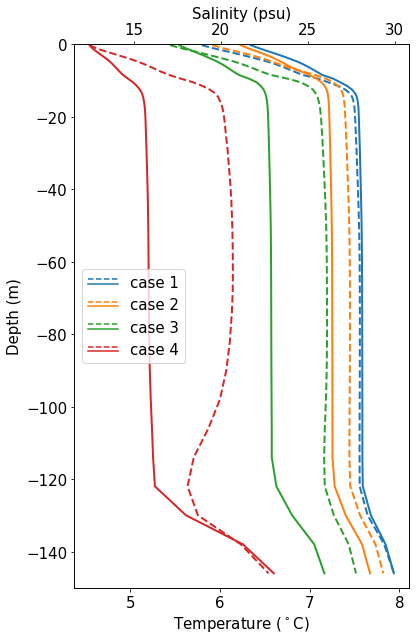

In [5]:
xj, yj = 3, 35

fig2 = plt.figure(figsize=(6,10))
fig2.tight_layout()  

ax1 = fig2.add_subplot(111)
ax1.set_ylim([-150, 0])
ax2 = ax1.twiny()

p1t = ax1.plot(pt_end1[:,yj,xj], depth, '--', lw=2)
p1s = ax2.plot(s_end1[:,yj,xj], depth, '-', lw=2)

p2t = ax1.plot(pt_end2[:,yj,xj], depth, '--', lw=2)
p2s = ax2.plot(s_end2[:,yj,xj], depth, '-', lw=2)

p3t = ax1.plot(pt_end3[:,yj,xj], depth, '--', lw=2)
p3s = ax2.plot(s_end3[:,yj,xj], depth, '-', lw=2)

p4t = ax1.plot(pt_end4[:,yj,xj], depth, '--', lw=2)
p4s = ax2.plot(s_end4[:,yj,xj], depth, '-', lw=2)


from matplotlib.legend_handler import HandlerBase


class AnyObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        l1 = plt.Line2D([x0,y0+width], [0.7*height,0.7*height],
                           linestyle=orig_handle[1],color=orig_handle[0])
        l2 = plt.Line2D([x0,y0+width], [0.3*height,0.3*height], 
                           color=orig_handle[0])
        return [l1, l2]
    
plt.legend([("#1f77b4","--"), ("#ff7f0e","--"), ("#2ca02c","--"), ("#d62728","--")], ['case 1', 'case 2', 'case 3', 'case 4'],
           handler_map={tuple: AnyObjectHandler()}, loc='center left', fontsize=15)
#ax2.legend(title=r'$Q_{sg}=700\;m^3/s$', loc='center left', fontsize=15)

ax1.set_ylabel(r'Depth (m)', size=15)
ax1.set_xlabel(r'Temperature ($^\circ$C)', size=15)
ax2.set_xlabel(r'Salinity (psu)', size=15)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
ax2.xaxis.set_tick_params(labelsize=15)
#ax2.set_xticks(fontsize=15)

In [5]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/Model/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1.savefig(fig_path + '/initial_TS.png', dpi=200, bbox_inches='tight')
#fig2.savefig(fig_path + '/Final_TS.png', dpi=200, bbox_inches='tight')